In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (14, 10)


# Wiener filter

Ref: https://github.com/tranleanh/Wiener-Median-Comparison

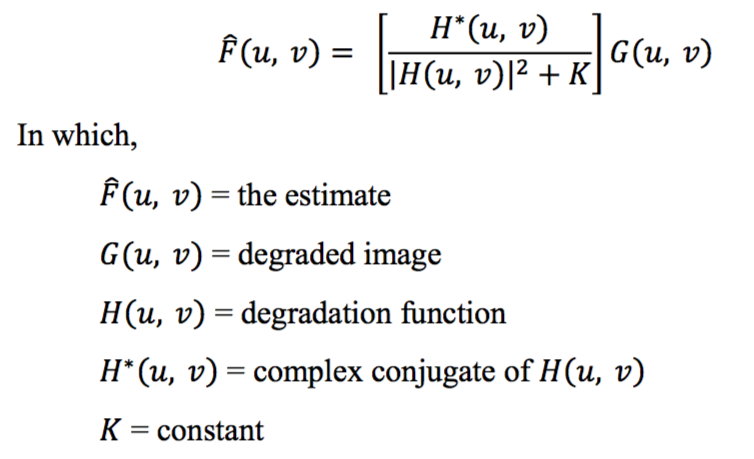

In [29]:
from numpy.fft import fft2, ifft2
from scipy.signal import gaussian, convolve2d

In [30]:
def blur(img, kernel_size = 3):
    dummy = np.copy(img)
    h = np.eye(kernel_size) / kernel_size
    dummy = convolve2d(dummy, h, mode = 'valid')
    return dummy


In [31]:
def add_gaussian_noise(img, sigma):
    gauss = np.random.normal(0, sigma, np.shape(img))
    noisy_img = img + gauss
    noisy_img[noisy_img < 0] = 0
    noisy_img[noisy_img > 255] = 255
    return noisy_img

In [27]:
def gaussian_kernel(kernel_size=3):
    h = gaussian(kernel_size, kernel_size/3).reshape(kernel_size, 1)
    h = np.dot(h, h.transpose())
    h /= np.sum(h)
    return h

In [28]:
def wiener_filter(img, kernel, K):
    kernel /= np.sum(kernel)
    dummy = np.copy(img)
    dummy = fft2(dummy)
    kernel = fft2(kernel, s=img.shape)
    kernel = np.conj(kernel)/(np.abs(kernel)**2 + K)
    dummy = dummy * kernel
    dummy = np.abs(ifft2(dummy))
    return dummy

In [32]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [33]:
img = rgb2gray(plt.imread('lena.jpg'))

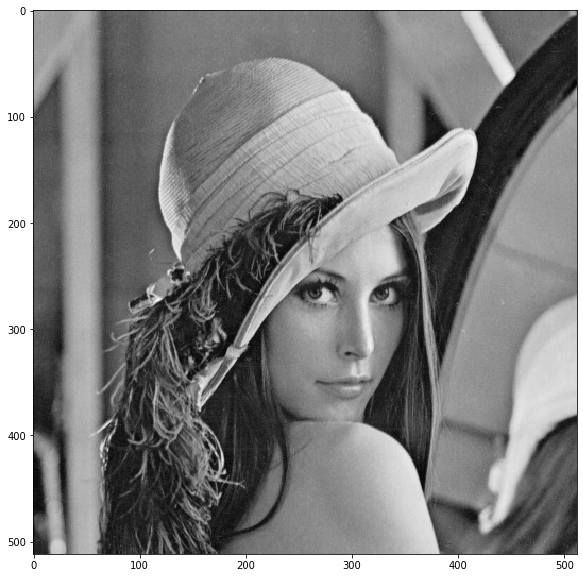

In [34]:
plt.imshow(img, cmap='gray')

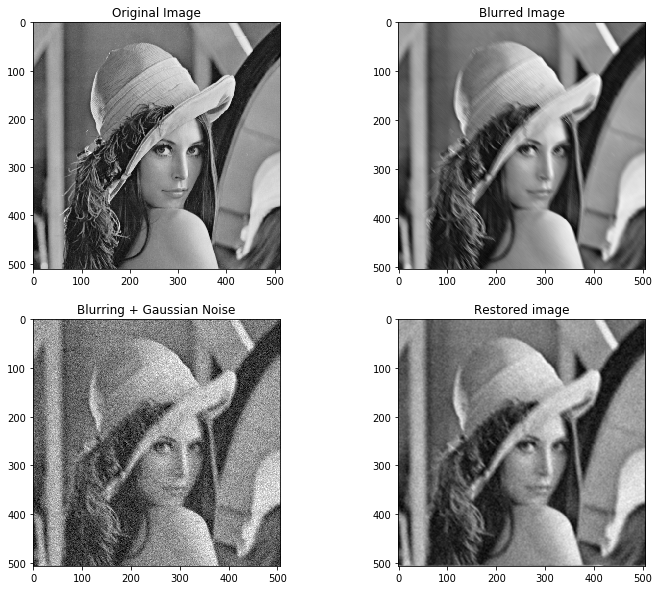

In [36]:
# Blur the image
blurred_img = blur(img, kernel_size = 7)

# Add Gaussian noise
noisy_img = add_gaussian_noise(blurred_img, sigma = 20)

# Apply Wiener Filter
kernel = gaussian_kernel(5)
filtered_img = wiener_filter(noisy_img, kernel, K = 10)

# Display results
display = [img, blurred_img, noisy_img, filtered_img]
label = ['Original Image', 'Blurred Image', 'Blurring + Gaussian Noise', 'Restored image']

fig = plt.figure(figsize=(12, 10))

for i in range(len(display)):
    fig.add_subplot(2, 2, i+1)
    plt.imshow(display[i], cmap = 'gray')
    plt.title(label[i])

plt.show()


# Unsupervised Wiener algorithm

François Orieux, Jean-François Giovannelli, and Thomas Rodet, “Bayesian estimation of regularization and point spread function parameters for Wiener-Hunt deconvolution”, J. Opt. Soc. Am. A 27, 1593-1607 (2010)

https://scikit-image.org/docs/dev/auto_examples/filters/plot_restoration.html

In [17]:
from skimage import color, data, restoration
from scipy.signal import convolve2d as conv2

In [25]:
astro = color.rgb2gray(data.astronaut())
ori = astro.copy()

psf = np.ones((5, 5))/25

astro = conv2(astro, psf, 'same') #degradation

astro += 0.1 * astro.std() * np.random.standard_normal(astro.shape)  #noise

deconvolved, _ = restoration.unsupervised_wiener(astro, psf)




(<matplotlib.axes._subplots.AxesSubplot at 0x12c991198>,
 Text(0.5, 1.0, 'restored'))

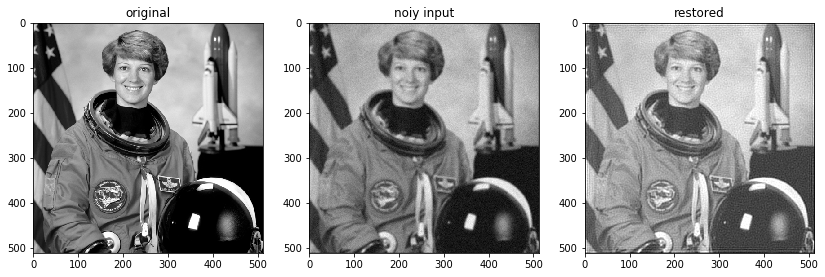

In [26]:
plt.gray()
plt.subplot(1, 3, 1), plt.imshow(ori), plt.title("original")
plt.subplot(1, 3, 2), plt.imshow(astro), plt.title('noiy input')
plt.subplot(1, 3, 3), plt.imshow(deconvolved), plt.title('restored')

# Motion blur

Ref: https://github.com/michal2229/dft-wiener-deconvolution-with-psf/blob/master/deconv_cv.py

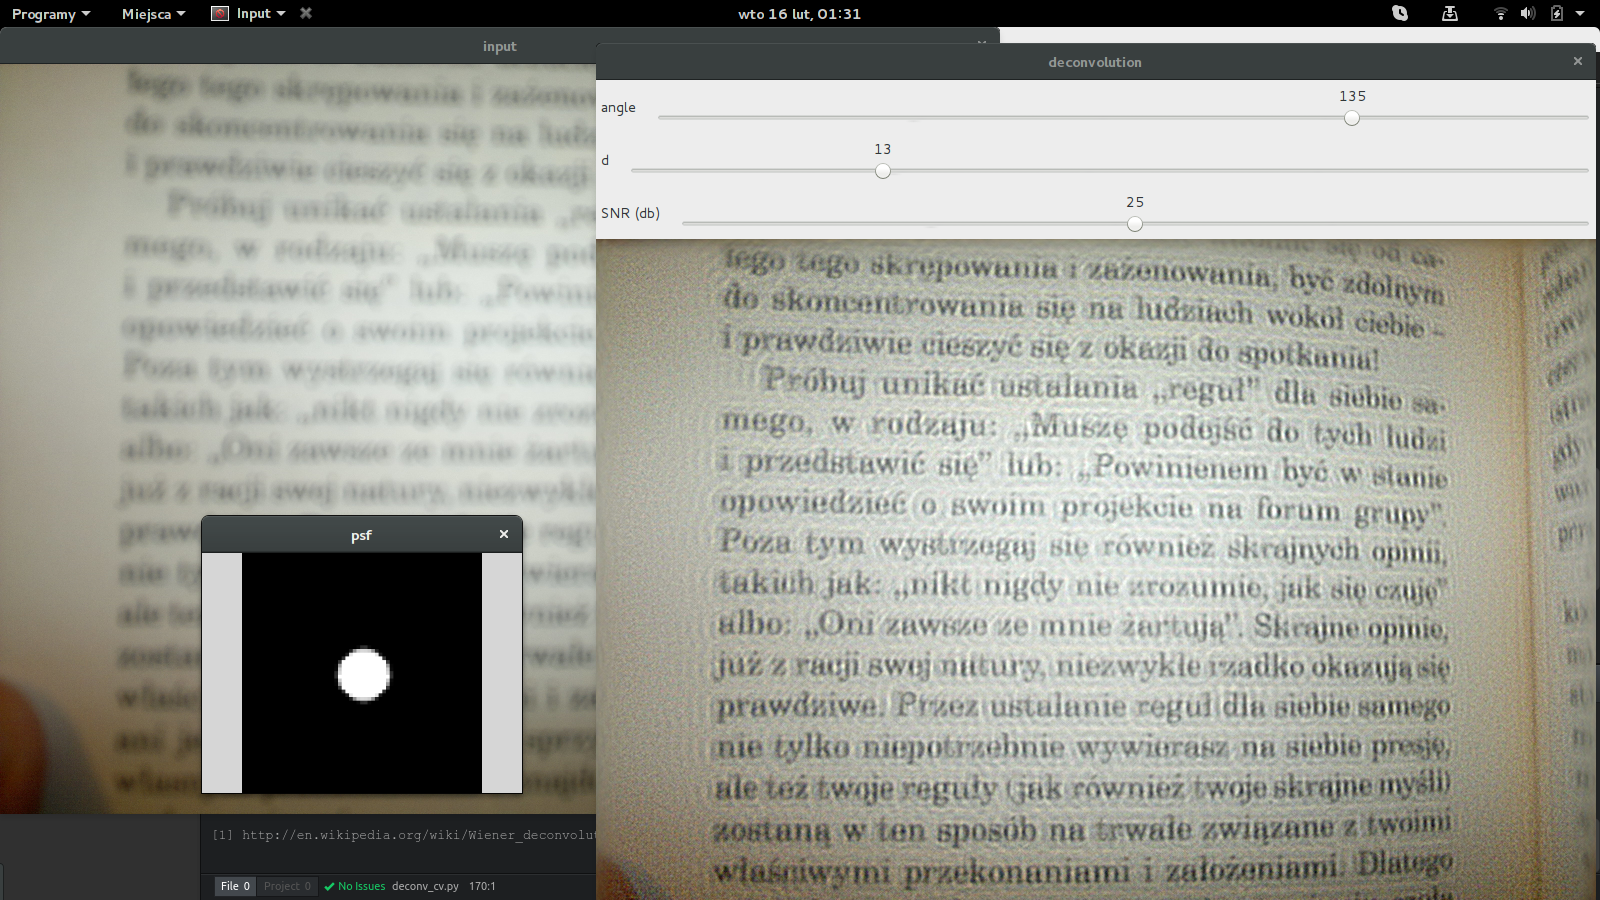